# Исследования по классификации

In [19]:
import json
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

%matplotlib inline

In [3]:
df = pd.read_csv('../data/raw/heart_cleveland_upload.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


In [4]:
X = df.copy()
y = X["condition"]
X.drop(inplace=True, columns=['condition'])

In [5]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)

Корреляция

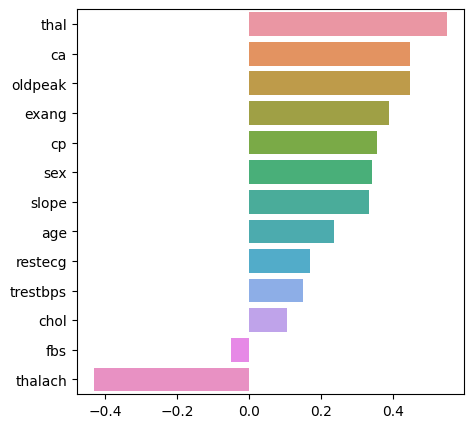

In [6]:
numeric_data = X_train.select_dtypes([np.number])

numeric_features = numeric_data.columns

correlations = X_train[numeric_features].corrwith(y_train).sort_values(ascending=False)


plot = sns.barplot(y=correlations.index, x=correlations)
plot.figure.set_size_inches(5, 5)

In [52]:
rf_model = RandomForestClassifier(n_estimators=100, max_depth=None)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.79      0.82        56
           1       0.75      0.84      0.79        43

    accuracy                           0.81        99
   macro avg       0.81      0.81      0.81        99
weighted avg       0.81      0.81      0.81        99



In [81]:
gnb_model = GaussianNB()
gnb_model.fit(X_train, y_train)
y_pred = gnb_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.80      0.84        56
           1       0.77      0.86      0.81        43

    accuracy                           0.83        99
   macro avg       0.83      0.83      0.83        99
weighted avg       0.83      0.83      0.83        99



In [79]:
gb_model = GradientBoostingClassifier(learning_rate=1e-1, n_estimators=200, max_depth=1)
gb_model.fit(X_train, y_train)
y_pred = gb_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.82      0.84        56
           1       0.78      0.84      0.81        43

    accuracy                           0.83        99
   macro avg       0.83      0.83      0.83        99
weighted avg       0.83      0.83      0.83        99



In [20]:
gnb_pipe = Pipeline(
    [('scaler', StandardScaler()),
     ('gnb', GaussianNB())]
)
gnb_pipe.fit(X_train, y_train)
y_pred = gnb_pipe.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.80      0.84        56
           1       0.77      0.86      0.81        43

    accuracy                           0.83        99
   macro avg       0.83      0.83      0.83        99
weighted avg       0.83      0.83      0.83        99



# Итог

GaussianNB показал себя лучше всех.

После применения скейлера результат не изменился